# TestCase 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config2.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 2
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 2
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
if version == 1:
    from testcases.networks.test_2D.test_2.test_2_v1 import Run_laplacian2D,Poisson_2D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_2D import TestCase2
problem = TestCase2(version=version)

Using device: cpu
torch loaded; device is cpu


0.0   1.5
0.0   10.0
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe2.pth
network loaded
Error  tensor([0.0346])


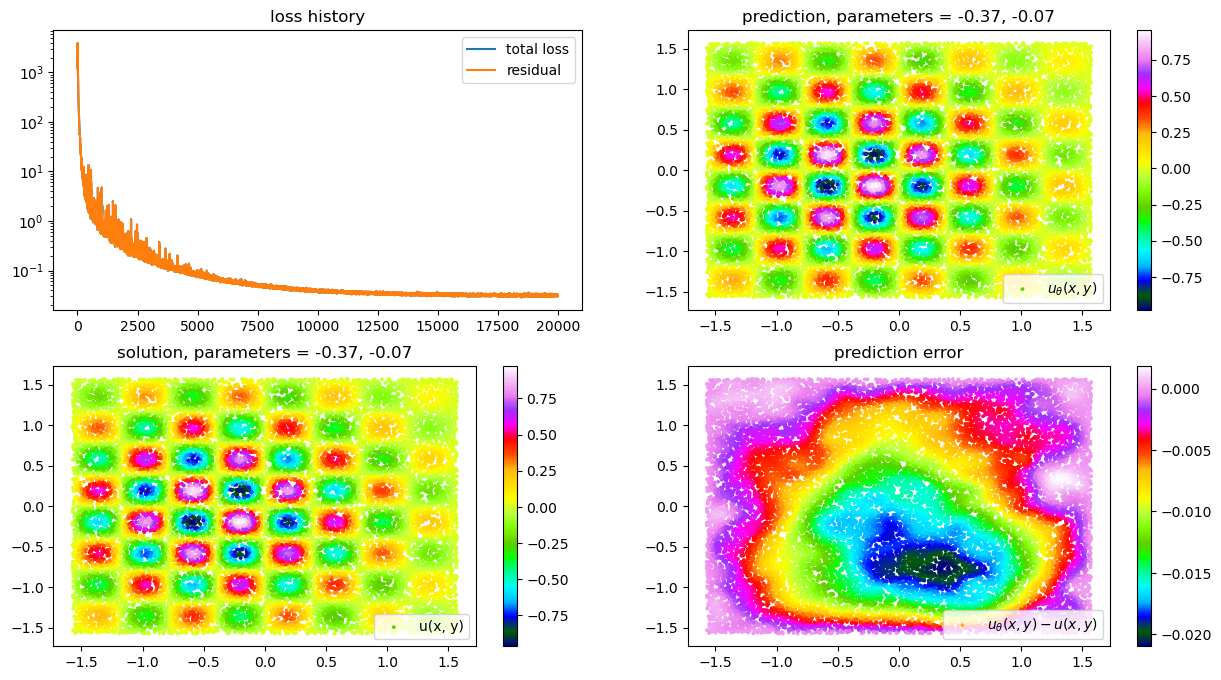

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree3.csv


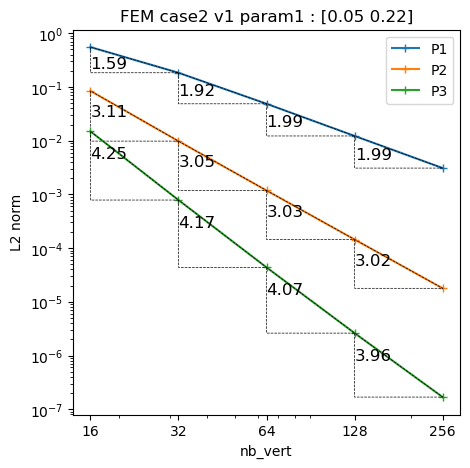

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/Corr_case2_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/Corr_case2_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/Corr_case2_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/Corr_case2_v1_param1_degree3.csv


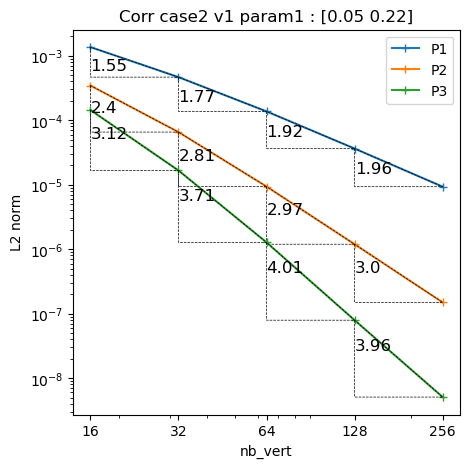

In [15]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/cvg/param1/FEM_case2_v1_param1_degree3.csv


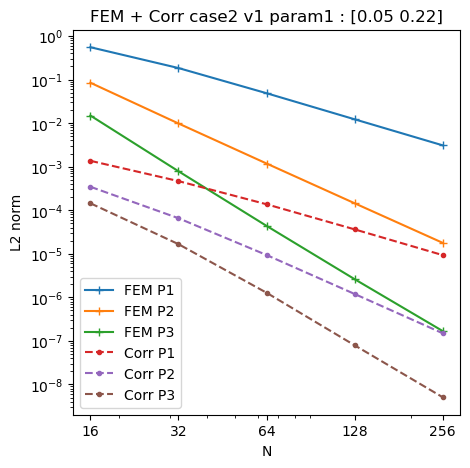

In [16]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [17]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

## Gains

### Imports

In [18]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [19]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/


### Run FEM

In [20]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree1.csv


In [21]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree3.csv


### Run PINNs

In [22]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/PINNs_errors_case2_v1_degree1.csv


In [23]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/PINNs_errors_case2_v1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/PINNs_errors_case2_v1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/PINNs_errors_case2_v1_degree3.csv


### Run Add

In [24]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.23383594411359887
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.11392007533739443
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [25]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/Corr_errors_case2_v1_degree1.csv
## Run errrors with Corr for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.23383594411359887
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.11392007533739443
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 ## Run errrors with Corr for degree=3
V_ex created with  501  vertices and degree  4  : h_ex = 0.008885765876317436
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.23383594411359887
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 4

### Compare methods

In [26]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree1.csv


In [27]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree3.csv


In [28]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree1.csv
method         PINNs                           FEM                       
type             min     max   mean    std     min     max    mean    std
method n_vert                                                            
Corr   20       9.16   36.18  19.80   6.63  112.19  450.80  349.84  82.90
       40      26.10  111.31  58.78  19.77  106.01  388.91  308.44  71.79


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


In [29]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree1.csv
method         PINNs                           FEM                       
type             min     max   mean    std     min     max    mean    std
method n_vert                                                            
Corr   20       9.16   36.18  19.80   6.63  112.19  450.80  349.84  82.90
       40      26.10  111.31  58.78  19.77  106.01  388.91  308.44  71.79


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree2.csv
method          PINNs                             FEM                       
type              min      max    mean     std    min     max    mean    std
method n_vert                                                               
Corr   20       35.89   164.85   87.44   29.21  65.44  210.59  159.41  38.96
       40      204.25  1088.02  516.55  179.21  52.50  139.60  109.72  22.04


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase2/version1/gains/FEM_errors_case2_v1_degree3.csv
method          PINNs                              FEM                     
type              min      max     mean     std    min    max   mean    std
method n_vert                                                              
Corr   20      100.37   533.16   252.86   88.38  32.91  81.05  63.00  12.73
       40      971.70  6165.56  2592.38  978.71  19.80  41.10  33.53   4.98


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
